In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#creating the dataframe using pandas
cars = pd.read_csv("Car_sales.csv")

In [22]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0


In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales_in_thousands     157 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           157 non-null object
Price_in_thousands     155 non-null float64
Engine_size            156 non-null float64
Horsepower             156 non-null float64
Wheelbase              156 non-null float64
Width                  156 non-null float64
Length                 156 non-null float64
Curb_weight            155 non-null float64
Fuel_capacity          156 non-null float64
Fuel_efficiency        154 non-null float64
Latest_Launch          157 non-null object
Power_perf_factor      155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [40]:
cars['Fuel_efficiency'].value_counts()

25.000000    23
24.000000    16
27.000000    15
22.000000    14
21.000000    14
23.000000    14
26.000000    12
19.000000     6
18.000000     5
30.000000     5
20.000000     5
15.000000     5
33.000000     4
23.844156     3
28.000000     3
16.000000     3
17.000000     3
31.000000     3
29.000000     2
32.000000     1
45.000000     1
Name: Fuel_efficiency, dtype: int64

In [13]:
drop_cols = ['Latest_Launch','Power_perf_factor','__year_resale_value']
cars = cars.drop(drop_cols, axis=1)

In [20]:
cars.shape

(157, 13)

In [18]:
cars = cars.drop_duplicates(keep='first')

In [21]:
cars.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
count,157.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,52.998076,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156
std,68.029422,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000
50%,29.450000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


In [23]:
#sort by fuel efficiency
cars_sort = cars.sort_values(by = 'Fuel_efficiency', ascending=False).head()
cars_sort.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
26,Chevrolet,Metro,21.855,Passenger,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0
136,Toyota,Corolla,142.535,Passenger,13.108,1.8,120.0,97.0,66.7,174.0,2.420,13.2,33.0
130,Saturn,SC,24.546,Passenger,12.535,1.9,100.0,102.4,66.4,180.0,2.367,12.1,33.0
129,Saturn,SL,80.620,Passenger,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0
25,Chevrolet,Prizm,32.299,Passenger,13.960,1.8,120.0,97.1,66.7,174.3,2.398,13.2,33.0


In [24]:
def min_max_values(col):
    '''
    the function takes a column name as the argument and 
    returns the top and bottom oservations in that dataframe
    '''
    top = cars[col].idxmax()
    top_obs = pd.DataFrame(cars.loc[top])
    
    bottom = cars[col].idxmin()
    bot_obs = pd.DataFrame(cars.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis =1)
    
    return min_max_obs

In [25]:
min_max_values('Fuel_efficiency')

,26,18
Manufacturer,Chevrolet,Cadillac
Model,Metro,Escalade
Sales_in_thousands,21.855,14.785
Vehicle_type,Passenger,Car
Price_in_thousands,9.235,46.225
Engine_size,1,5.7
Horsepower,55,255
Wheelbase,93.1,117.5
Width,62.6,77
Length,149.4,201.2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([11., 16., 42., 51., 20.,  9.,  4.,  0.,  0.,  1.]),
 array([15., 18., 21., 24., 27., 30., 33., 36., 39., 42., 45.]),
 <a list of 10 Patch objects>)

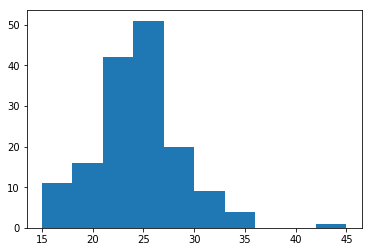

In [26]:
#visualize using histograms
num_bins= 10
plt.hist(cars['Fuel_efficiency'], num_bins)

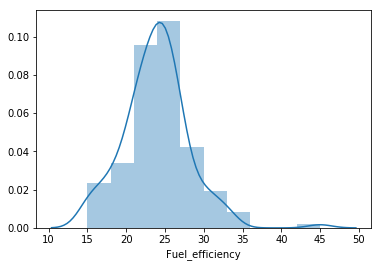

In [39]:
#probability distribution function curve. Note that with missing values the curve wont be plotted(treat missing values with mean)
sns.distplot(cars['Fuel_efficiency'], bins = 10)

In [42]:
cars.apply(lambda x: sum(x.isnull()), axis=0) #finding missing values in the dataframe

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         0
Fuel_efficiency       0
dtype: int64

In [43]:
cars['Fuel_efficiency'].fillna(cars['Fuel_efficiency'].mean(), inplace =True) #replacing missing values with mean
cars['Engine_size'].fillna(cars['Engine_size'].mean(), inplace =True) #replacing missing values with mean
cars['Horsepower'].fillna(cars['Horsepower'].mean(), inplace =True) #replacing missing values with mean
cars['Fuel_capacity'].fillna(cars['Fuel_capacity'].mean(), inplace =True) #replacing missing values with mean
cars['Price_in_thousands'].fillna(cars['Price_in_thousands'].mean(), inplace =True) #replacing missing with mean

(array([ 2., 27., 44., 43., 22., 10.,  7.,  1.,  0.,  1.]),
 array([ 55. ,  94.5, 134. , 173.5, 213. , 252.5, 292. , 331.5, 371. ,
        410.5, 450. ]),
 <a list of 10 Patch objects>)

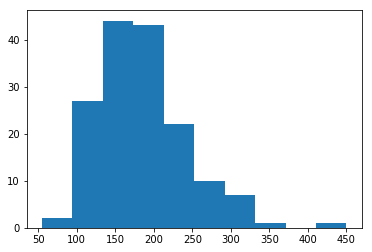

In [48]:
plt.hist(cars['Horsepower'], bins= 10)

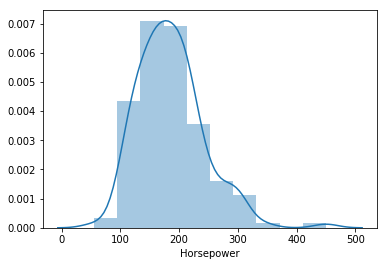

In [49]:
#probability distribution function curve. Note missing valuescurve wont be plotted(treat missing values with mean)
sns.distplot(cars['Horsepower'], bins = 10)

In [54]:
make_distribution = cars.groupby('Manufacturer').size() #distribution by manufacturer

In [53]:
make_distribution

Manufacturer
Acura          4
Audi           3
BMW            3
Buick          4
Cadillac       5
Chevrolet      9
Chrysler       7
Dodge         11
Ford          11
Honda          5
Hyundai        3
Infiniti       1
Jaguar         1
Jeep           3
Lexus          6
Lincoln        3
Mercedes-B     9
Mercury        6
Mitsubishi     7
Nissan         7
Oldsmobile     6
Plymouth       4
Pontiac        6
Porsche        3
Saab           2
Saturn         5
Subaru         2
Toyota         9
Volkswagen     6
Volvo          6
dtype: int64

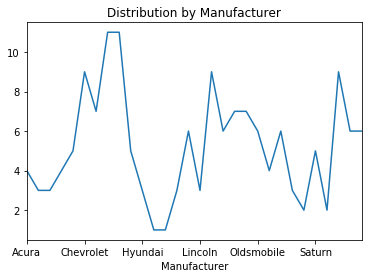

In [55]:
make_distribution.plot(title='Distribution by Manufacturer')

In [57]:
#select all numerical  values
cars_num = cars.select_dtypes(include=['float64', 'int64'])
cars_num.head()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
0,16.919,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,39.384,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,14.114,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,8.588,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,20.397,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1217e3978>,
      dtype=object)

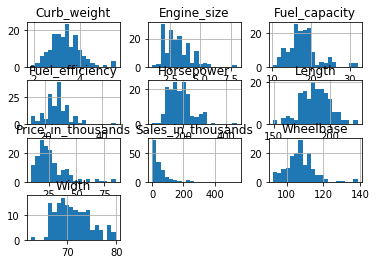

In [58]:
cars_num.hist(bins=20)

In [72]:
cars_correlation = cars_num.corr()['Fuel_efficiency'][:-1]

In [73]:
cars_correlation

Sales_in_thousands   -0.016747
Price_in_thousands   -0.491489
Engine_size          -0.733920
Horsepower           -0.610648
Wheelbase            -0.497023
Width                -0.599465
Length               -0.443993
Curb_weight          -0.818284
Fuel_capacity        -0.801355
Name: Fuel_efficiency, dtype: float64

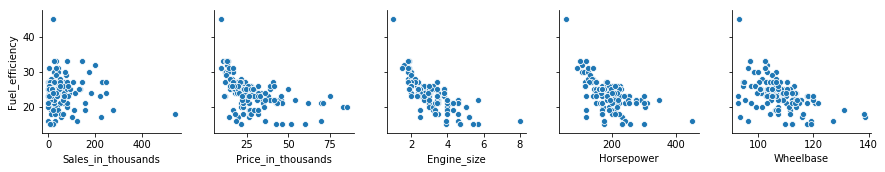

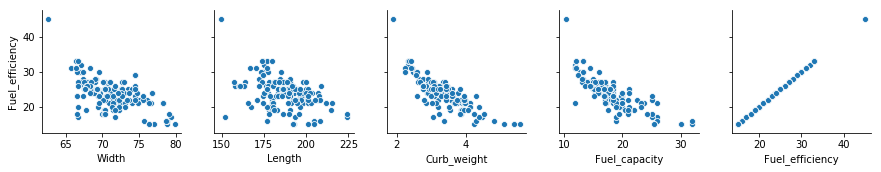

In [75]:
#correlation plots using pairplots
for i in range(0, len(cars_num.columns), 5):
    sns.pairplot(cars_num, y_vars=['Fuel_efficiency'], x_vars = cars_num.columns[i:i+5])

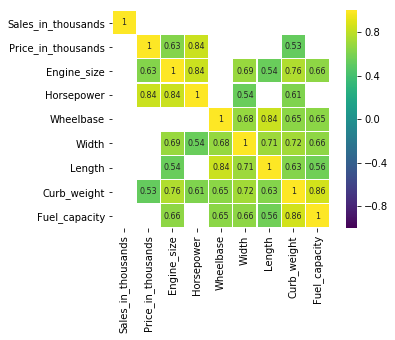

In [76]:
#plotting significant correlation in one plot
corr = cars_num.drop('Fuel_efficiency', axis=1).corr()
sns.heatmap(corr[(corr>=0.5) | (corr <= -0.4)],
           cmap = 'viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={'size':8}, square=True);

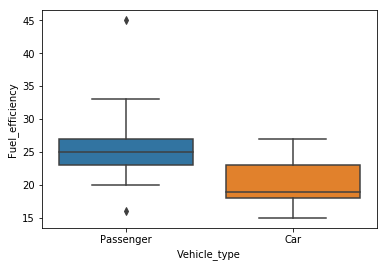

In [80]:
#box_plot (categorical variable)
box1 = sns.boxplot(x='Vehicle_type', y='Fuel_efficiency', data=cars)

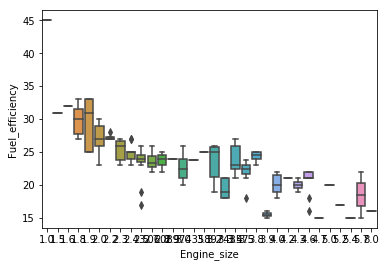

In [81]:
box1 = sns.boxplot(x='Engine_size', y='Fuel_efficiency', data=cars)

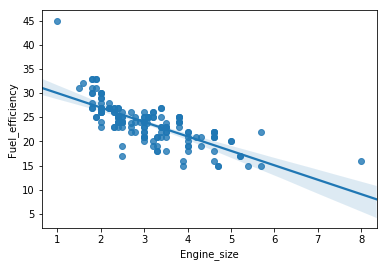

In [88]:
#regression plot
sns.regplot(cars['Engine_size'], cars['Fuel_efficiency'])

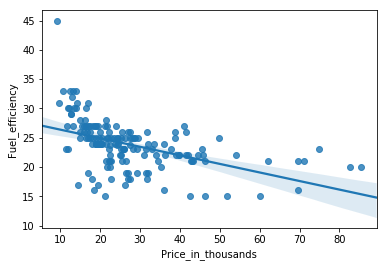

In [87]:
sns.regplot(cars['Price_in_thousands'], cars['Fuel_efficiency'])